# SGD and Polynomial Regression Examples with CV and Learning Curves

+ Using sklean and synthetic data

## SGD Regression Mechanics

### Packages

In [1]:
%matplotlib inline
# data and plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# modeling packages
import scipy.stats as stats
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import mlutils

### Display Settings

In [2]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

### Data Generation

In [3]:
np.random.seed(0)     # fix the seed for reproducibily

n_samples = 1000   # total number of samples
n_features = 10    # total features from which we randomly select a subset of n_features
n_train = 800      # number of samples to use for training

# precision for weights
lmbda = 1.0          # 1/lmbda is the variance of the normal from which we generate weights
# precision for noise
alpha = 0.5          #  1/alpha is the variance of the normal from which we generate noise

X = np.random.randn(n_samples, n_features)                       # standard normal deviates

# create weights for each feature
# the weights are samples from the normal distribution with zero mean and variance = 1/lmbda
w = stats.norm.rvs(loc=0, scale=1.0 / np.sqrt(lmbda), size=n_features)
# create white noise by sampling  the normal distribution with zero mean and variance = 1/alpha
noise = stats.norm.rvs(loc=0, scale=1.0 / np.sqrt(alpha), size=n_samples)
# create the output variable
y = X @ w + noise

# train-test split by hand
X_train, y_train, X_test, y_test =  X[:n_train,:], y[:n_train], X[n_train:,:], y[n_train:]

 ### Model Fit
 We use SGD. The default settings use least squares penalty and L2 regularization with alpha=0.0001.  
 To see the progress of the iterative fit, run it with verbose=1

In [4]:
sgd = SGDRegressor(max_iter=100, tol=1e-4, verbose=1)

print("SGD parameters:")
display(sgd.get_params())

sgd.fit(X_train, y_train)
display(pd.DataFrame({'Real Weights': w, 'SGD Weights': sgd.coef_}))

SGD parameters:


{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 100,
 'n_iter': None,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 1,
 'warm_start': False}

-- Epoch 1
Norm: 2.41, NNZs: 10, Bias: 0.044526, T: 800, Avg. loss: 1.772808
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.74, NNZs: 10, Bias: 0.071566, T: 1600, Avg. loss: 1.035480
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.83, NNZs: 10, Bias: 0.062990, T: 2400, Avg. loss: 1.001755
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.85, NNZs: 10, Bias: 0.085247, T: 3200, Avg. loss: 0.998057
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.85, NNZs: 10, Bias: 0.066510, T: 4000, Avg. loss: 0.996020
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.85, NNZs: 10, Bias: 0.069950, T: 4800, Avg. loss: 0.994907
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.86, NNZs: 10, Bias: 0.077227, T: 5600, Avg. loss: 0.995276
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.87, NNZs: 10, Bias: 0.071645, T: 6400, Avg. loss: 0.994813
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.86, NNZs: 10, Bias: 0.072762, T: 7200, Avg. loss: 0.994999
Total training time

,Real Weights,SGD Weights
0,-0.202117,-0.164055
1,-0.833231,-0.905413
2,1.733600,1.661782
3,0.190649,0.164756
4,-0.177810,-0.141720
5,-1.085025,-1.066373
6,0.972262,1.004965
7,1.431472,1.429080
8,-0.245073,-0.222880
9,-0.623254,-0.559194


### Model Metrics

In [5]:
r2_in = sgd.score(X_train, y_train)
r2_out = sgd.score(X_test, y_test)

print("In-sample R-Squared={0:5.4f}".format(r2_in))
print("Out-of-sample R-Squared={0:5.4f}".format(r2_out))

In-sample R-Squared=0.7919
Out-of-sample R-Squared=0.7916


## SGD Polynomial Regression

First we generate some nonlinear noisy data.

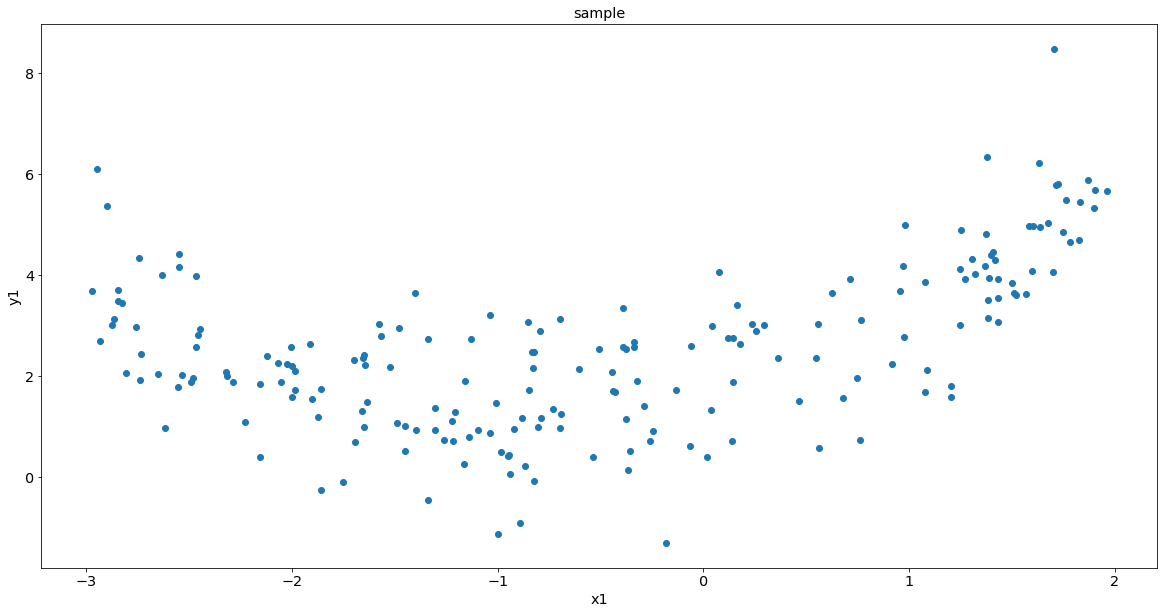

In [6]:
nobs = 200
x1 = 5 * np.random.rand(nobs, 1) - 3
# the output vector is quadratic in the input x1
intcpt = 2
coef1 = 1.0
coef2 = 0.5
y1 = coef2 * x1**2 + coef1 * x1 + intcpt + np.random.randn(nobs, 1)
# plot them
plt.plot(x1, y1, 'o')
plt.xlabel("x1")
plt.ylabel("y1")
plt.title("sample");


Create polynomial features and collect into the design matrix Phi

In [7]:
degree = 2
pol = PolynomialFeatures(degree=degree, include_bias=True)
Phi = pol.fit_transform(x1)

print("Design Matrix shape: {}".format(Phi.shape))
# display the top of the design matrix
pd.DataFrame(data=Phi).head()

Design Matrix shape: (200, 3)


,0,1,2
0,1.0,-0.892955,0.797368
1,1.0,-1.911631,3.654332
2,1.0,1.386594,1.922643
3,1.0,-2.457879,6.041170
4,1.0,-2.948757,8.695168


We fit a Linear Regression model with the above

True coefficients:
intercept: 2.00,  coef1: 1.00,  coef2: 0.50
Fitted coefficients:
intercept: 1.76,  coef1: 0.00,  coef2: 0.98


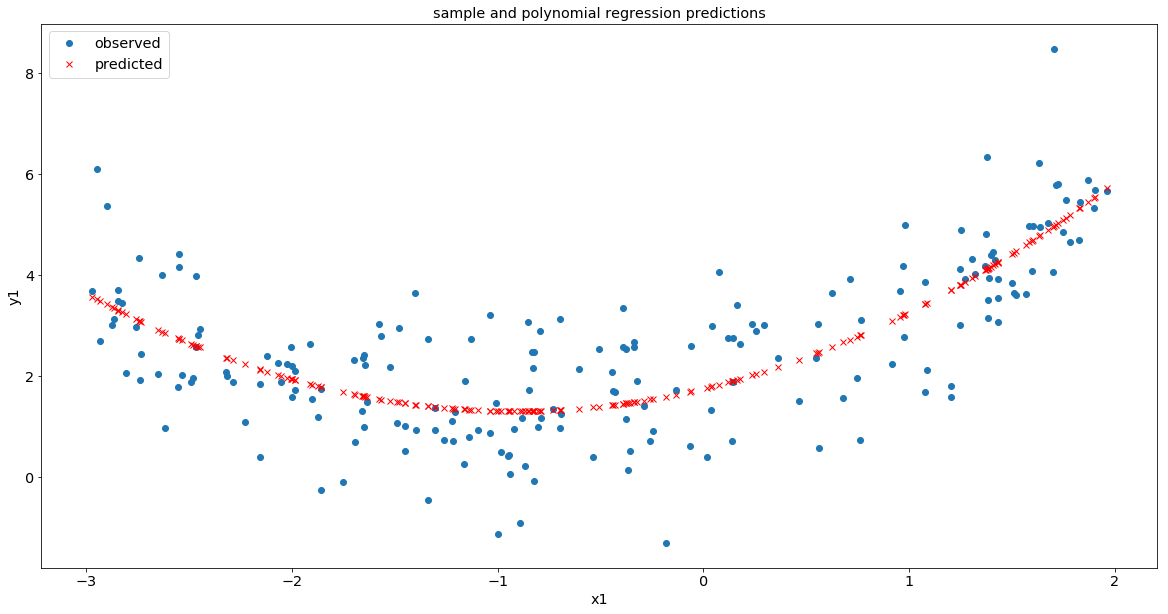

In [8]:
lm = LinearRegression()
lm.fit(Phi, y1)

fmtstr = "intercept: {0:4.2f},  coef1: {1:4.2f},  coef2: {2:4.2f}"
print("True coefficients:")
print(fmtstr.format(intcpt, coef1, coef2))
print("Fitted coefficients:")
print(fmtstr.format(lm.intercept_[0], lm.coef_[0,0], lm.coef_[0,1]))

# plot
y1_pred = lm.predict(Phi)
plt.plot(x1, y1, 'o', label = "observed")
plt.plot(x1, y1_pred, 'xr', label = "predicted")
plt.xlabel("x1")
plt.ylabel("y1")
plt.title("sample and polynomial regression predictions");
plt.legend();

### Learning Curves

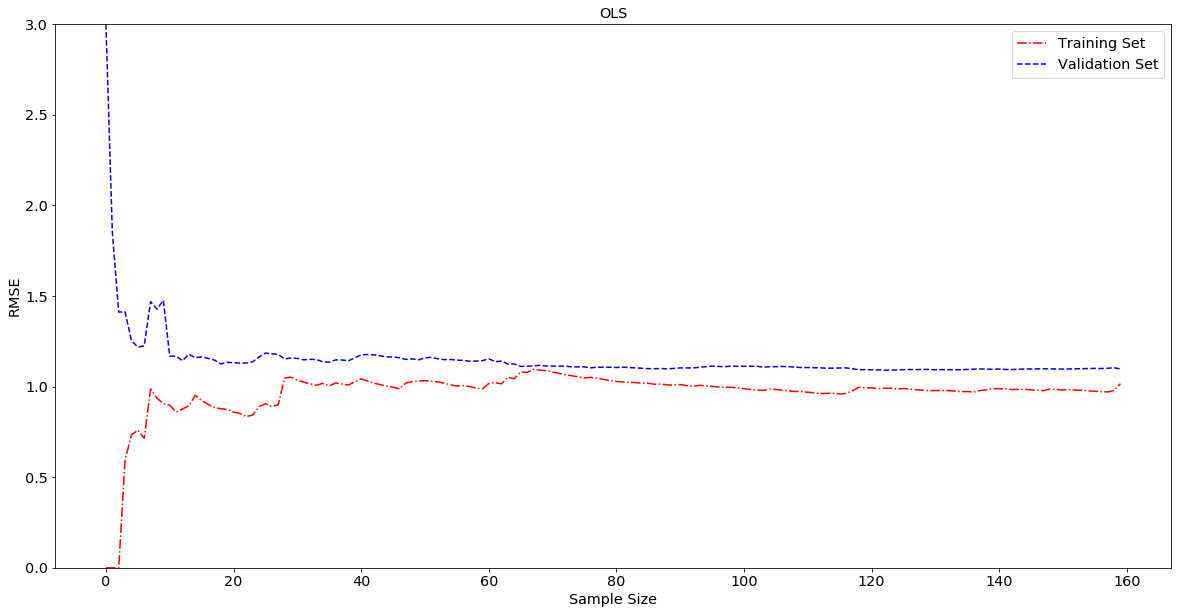

In [9]:
fig, ax1 = plt.subplots()
mlutils.plot_learning_curves(lm, Phi, y1, ax1, test_size=0.2, random_state=0)
ax1.set(ylim=[0, 3.0], title='OLS');

### Pipeline

Let's use a 10-degree polynomial and a pipeline to create features and fit the model in sequence.

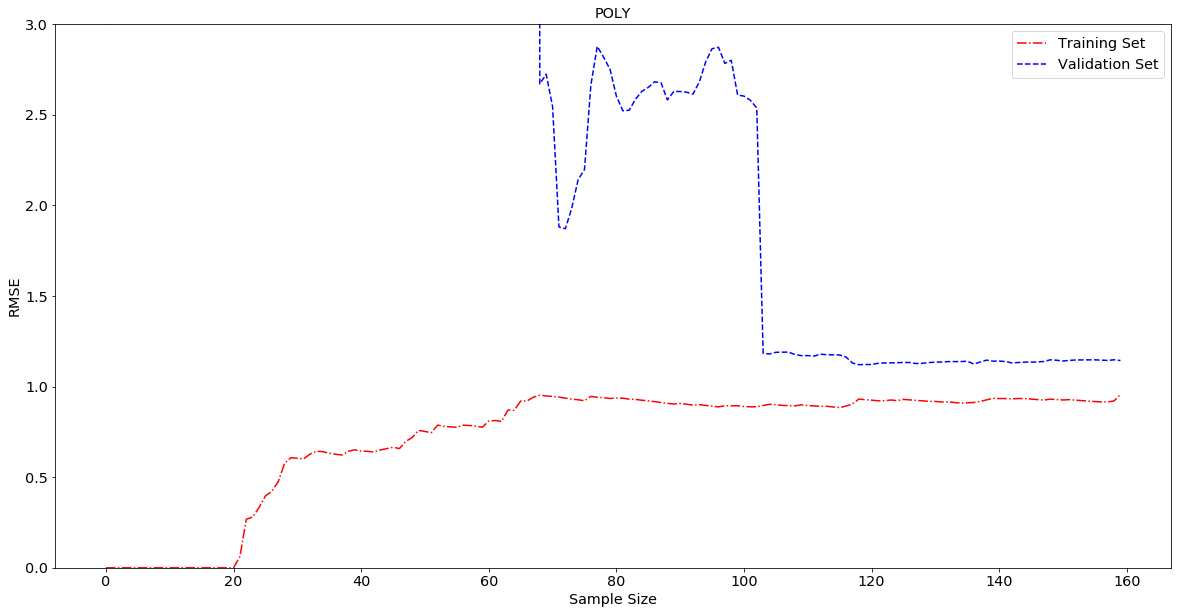

In [10]:
polreg = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=True)),
    ("lin_reg", LinearRegression()),
))

fig2, ax2 = plt.subplots()
mlutils.plot_learning_curves(polreg, Phi, y1, ax2, test_size=0.2, random_state=0)
ax2.set(ylim=[0, 3.0], title='POLY');